In [4]:
# Import numpy with alias np
import pandas as pd
import numpy as np  
food_consumption = pd.read_csv('food_consumption.csv')
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country']=='Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print(be_consumption.agg(np.mean))
print(be_consumption.agg(np.median))

# Calculate mean and median consumption in USA
print(usa_consumption.agg(np.mean))
print(usa_consumption.agg(np.median))

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
Unnamed: 0      61.00
consumption     14.58
co2_emission    15.34
dtype: float64


C:\Users\thumt\Anaconda3\lib\site-packages\pandas\core\apply.py:169: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, f)()


In [6]:
food_consumption.describe()

,Unnamed: 0,consumption,co2_emission
count,1430.000000,1430.000000,1430.000000
mean,715.500000,28.110406,74.383993
std,412.949755,49.818044,152.098566
min,1.000000,0.000000,0.000000
25%,358.250000,2.365000,5.210000
50%,715.500000,8.890000,16.530000
75%,1072.750000,28.132500,62.597500
max,1430.000000,430.760000,1712.000000


In [5]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


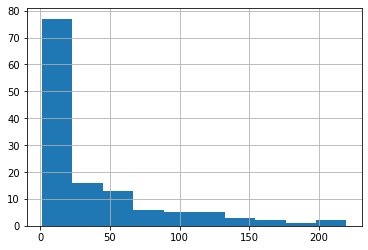

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [9]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
%matplotlib inline
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

In [10]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.25,0.5,0.75,1]))
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],(0,0.2,0.4,0.6,0.8,1)))
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)))


[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


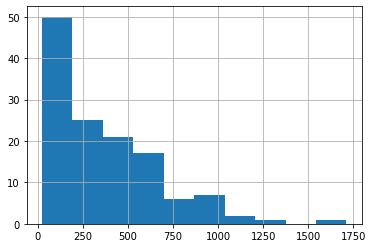

In [11]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()


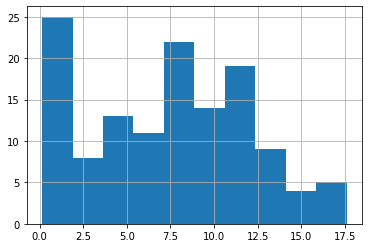

In [12]:
# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

In [13]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [18]:
amir_deals = pd.read_csv('amir_deals.csv')
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)
print(amir_deals.shape[0])
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64
178
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [19]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


   Unnamed: 0 group_id  group_size
0           0        A           2
1           1        B           4
2           2        C           6
3           3        D           2
4           4        E           2
5           5        F           2
6           6        G           3
7           7        H           2
8           8        I           4
9           9        J           2


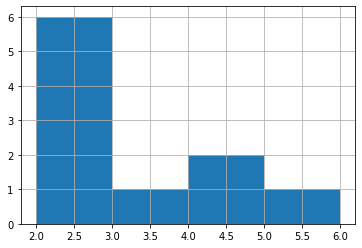

In [26]:
restaurant_groups = pd.read_csv('restaurant_groups.csv')
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()

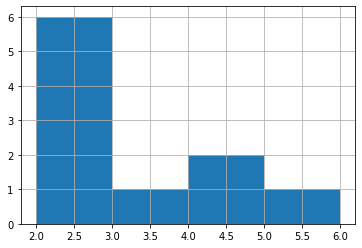

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
The expected value is 2.9000000000000004
The probability is  0.30000000000000004


In [33]:
restaurant_groups = pd.read_csv('restaurant_groups.csv')
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']
print(size_dist)

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print('The expected value is', expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print('The probability is ',prob_4_or_more)

In [34]:
#The sales software used at your company is set to automatically 
#back itself up, but no one knows exactly what time the back-ups happen. 
#It is known, however, that back-ups happen exactly every 30 minutes. 
#Amir comes back from sales meetings at random times to update the 
#data on the client he just met with. 
#He wants to know how long he'll have to wait for his newly-entered 
#data to get backed up. Use your new knowledge of continuous uniform 
#distributions to model this situation and answer Amir's questions.
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30)-uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.3333333333333333


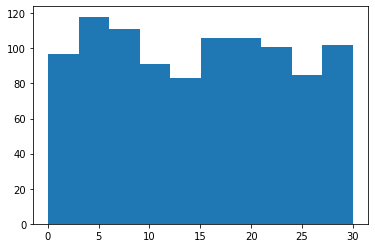

In [35]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

In [42]:
amir_deals['amount'].mean()

4812.000337078652

In [39]:
from scipy.stats import norm
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)

print(prob_less_7500)

0.8943502263331446


In [40]:
# Probability of deal > 1000
prob_over_1000 = 1-norm.cdf(1000,5000,2000)

print(prob_over_1000)

0.9772498680518208


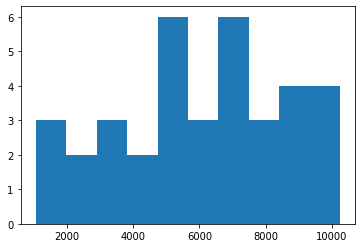

In [41]:
# Calculate new average amount
new_mean = 5000*1.2

# Calculate new standard deviation
new_sd = 2000*1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean,new_sd,size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

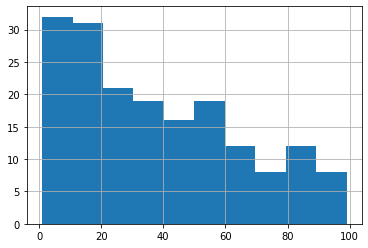

In [43]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

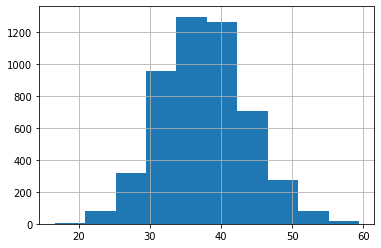

In [46]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

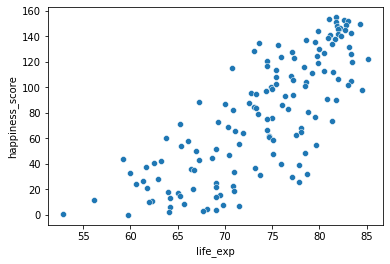

In [50]:
import seaborn as sns
world_happiness = pd.read_csv('world_happiness.csv')
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()

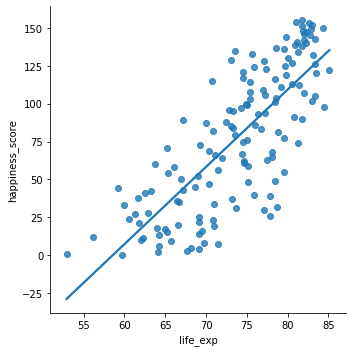

In [51]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness,ci=None)

# Show plot
plt.show()

In [56]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print('The correlation is', cor)

The correlation is 0.7802249053272062


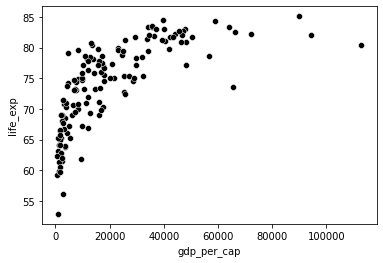

In [55]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y = 'life_exp', data=world_happiness, color = 'black')

# Show plot
plt.show()

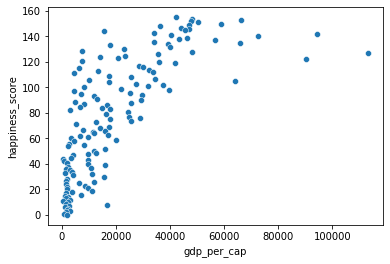

0.7279733012222976


In [57]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['happiness_score'].corr(world_happiness['gdp_per_cap'])
print(cor)

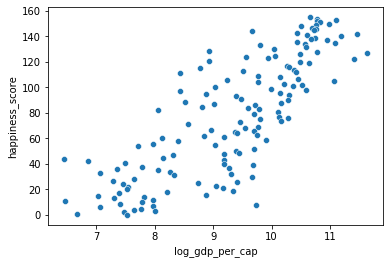

0.8043146004918288


In [58]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

In [60]:
world_happiness.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score,log_gdp_per_cap
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155,10.654904
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154,10.785187
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153,11.101945
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152,10.776871
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151,10.829729
